# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [31]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [32]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [33]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [34]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [35]:
for col in df.columns:
    print(col,  df[col].unique())
    print('--------------------')


num_passengers [2 1 3 4 6 5 7 9 8]
--------------------
sales_channel ['Internet' 'Mobile']
--------------------
trip_type ['RoundTrip' 'CircleTrip' 'OneWay']
--------------------
purchase_lead [262 112 243  96  68   3 201 238  80 378 185   8 265 245 192 259  19  67
 351 228  21  23  25  16  66  51  37 101   7   5  33  20  56  13  71 346
   9  65 221 107  14  77  24  47  22  11  35 272 250 161 128 190 311  27
 314 102   2  26  32  57 198 120  69 281 282  15  31 316 232 156 196 283
  34  63   6 227 181 138 134  85  93 118  90 168 127  18 153 186 263 172
 230  42  81 140 285 179 341 173 180 366 229 174  82  75 163 105 276 110
  83 154  55  45  54 193  10 166  97 239 182  99  53  28 384  70 126 142
  87  86 313  41  91 206 197 268 157 145 241 139  59 396 280  79 380 132
 121 419  58 115 236 225 116 191 275 417 159  92 106 218 295  12 305 235
 332 125 204 310 368 169 214 155 325 130 189 226 122  88 211 188 129 149
  38 194 183  40  95 135 222  64 162 150  73 133  89 151 349  29 123 298
 19

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sweetviz

                                             |      | [  0%]   00:00 -> (? left)


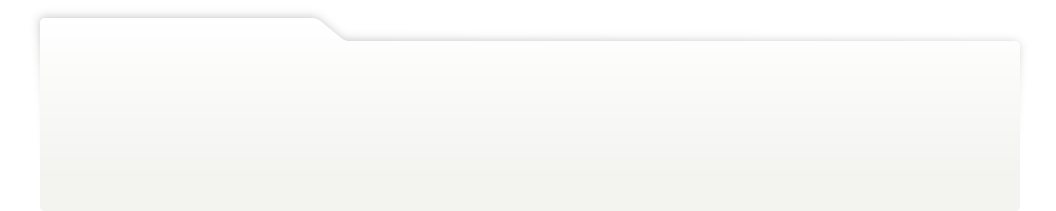
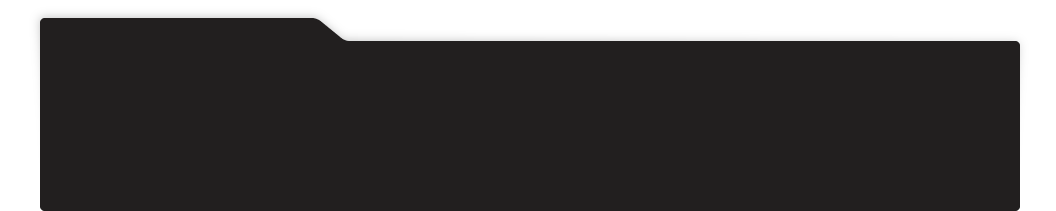
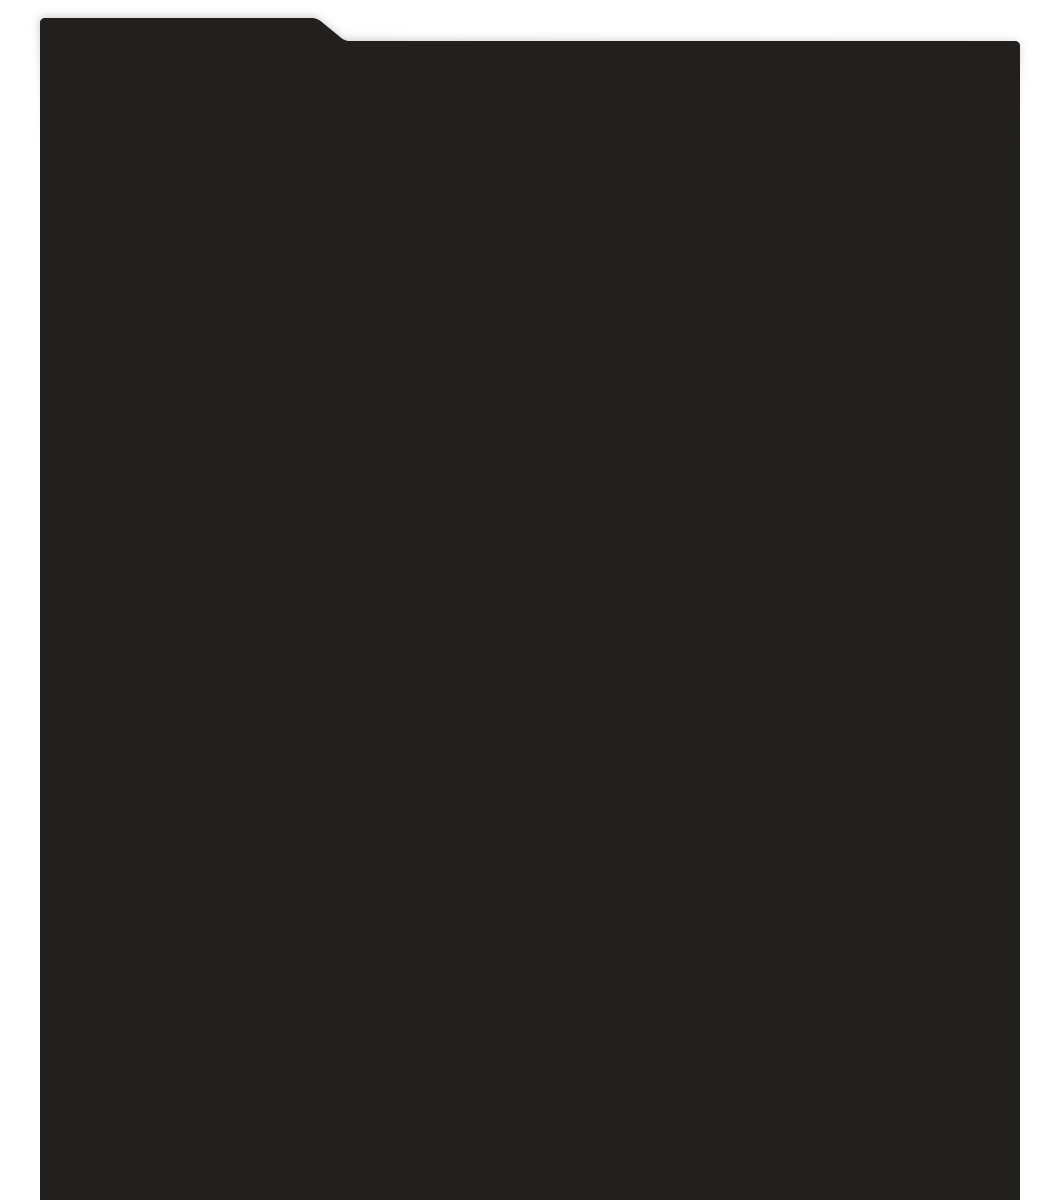
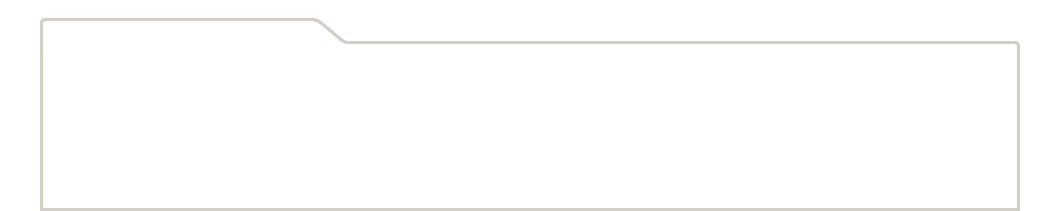
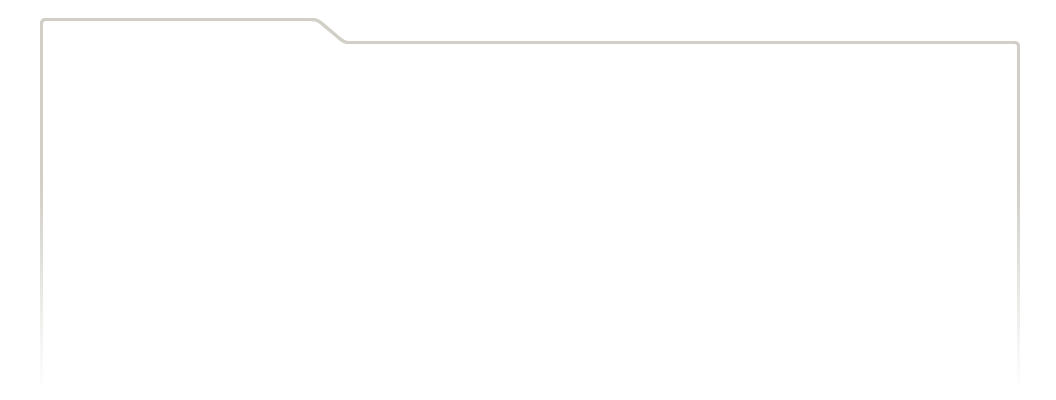
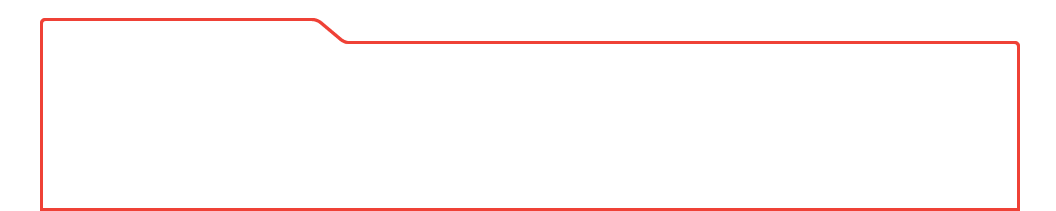
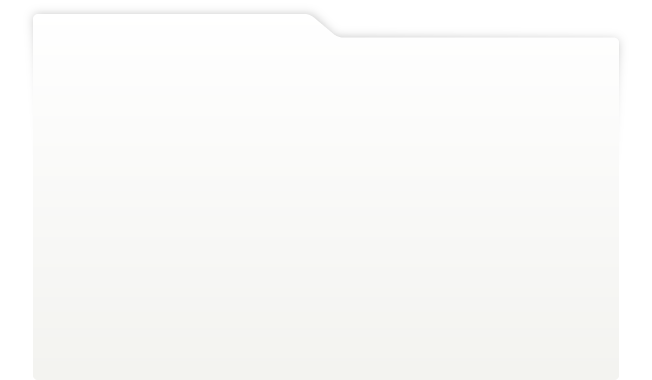
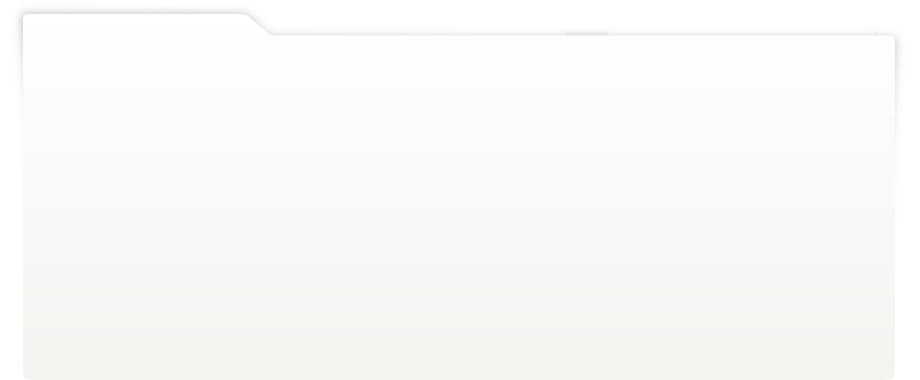
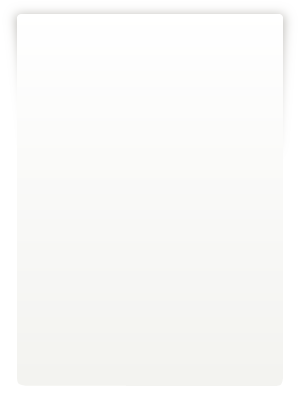
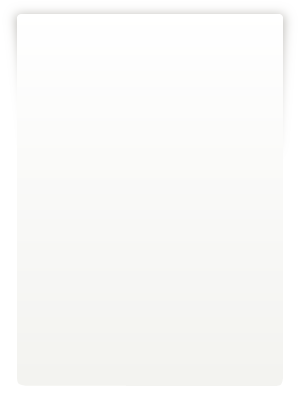
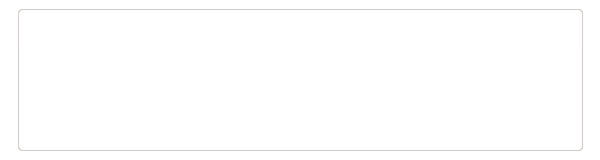
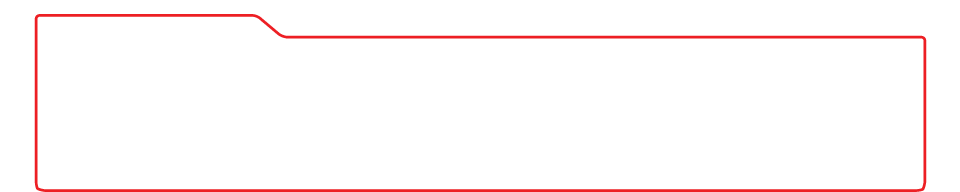
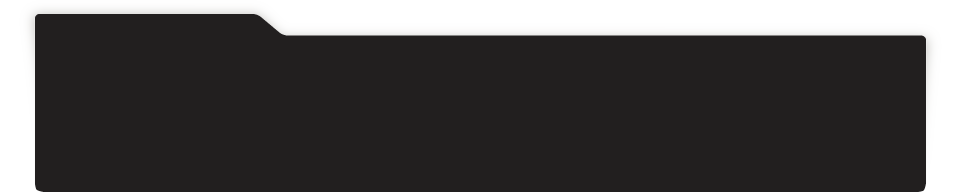
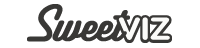
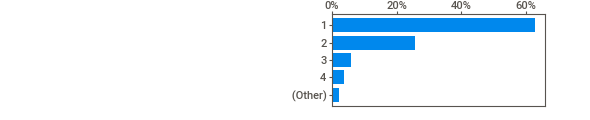
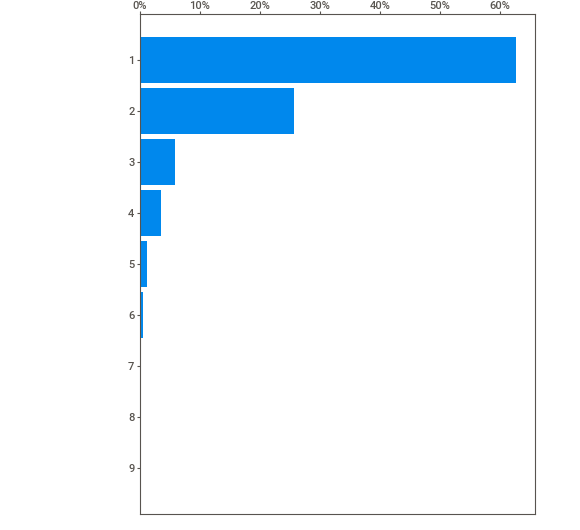
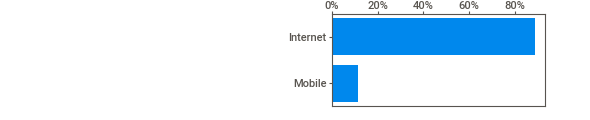
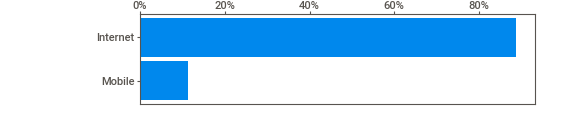
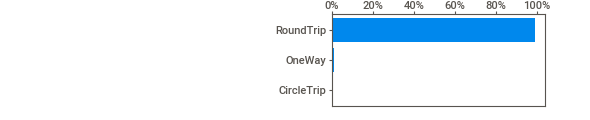
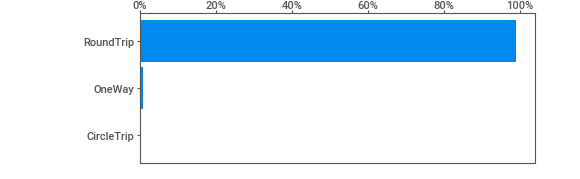
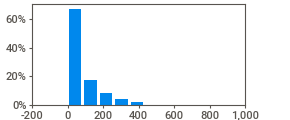
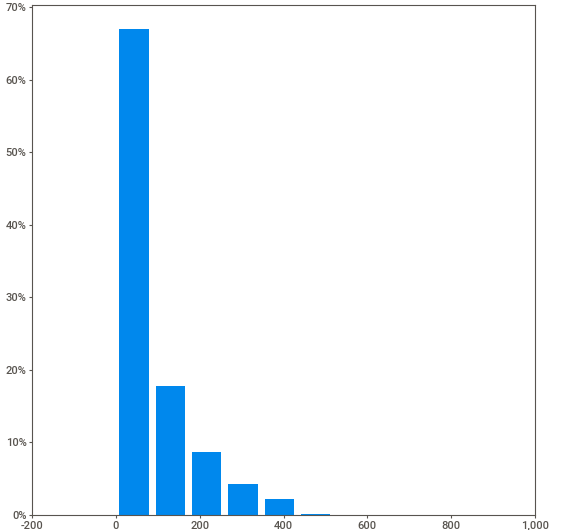
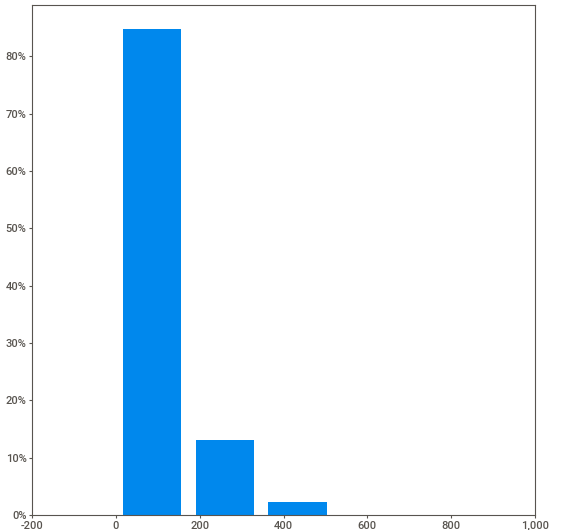
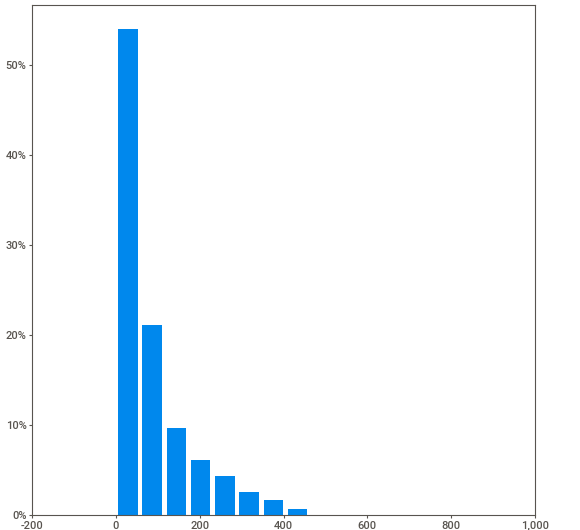
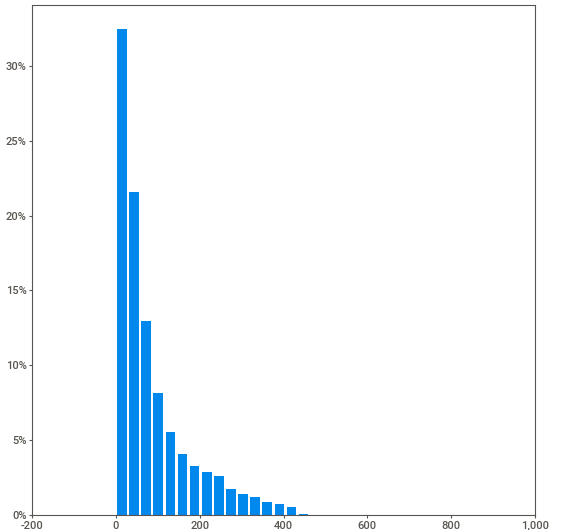
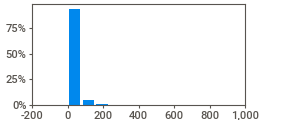
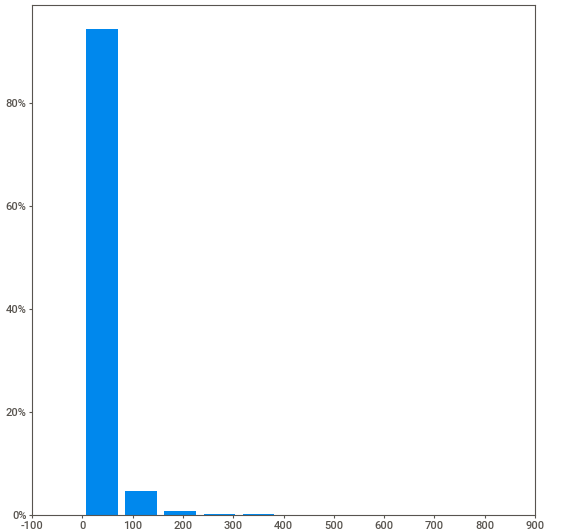
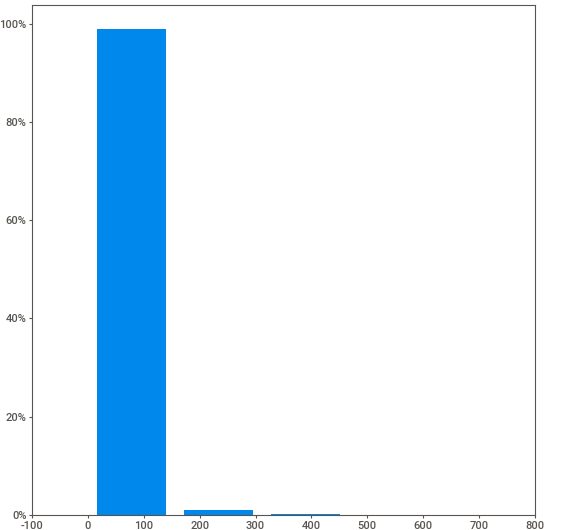
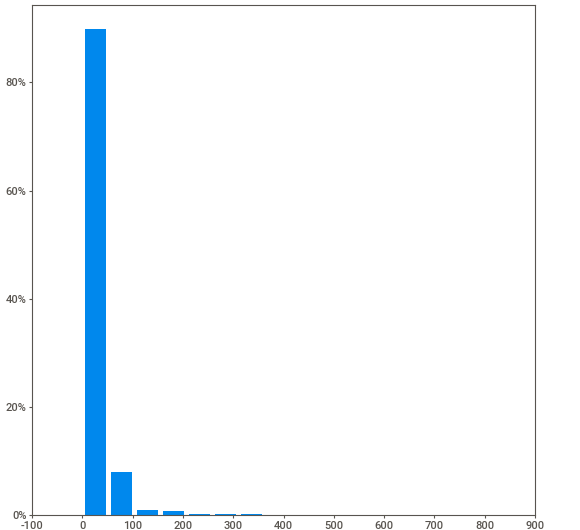
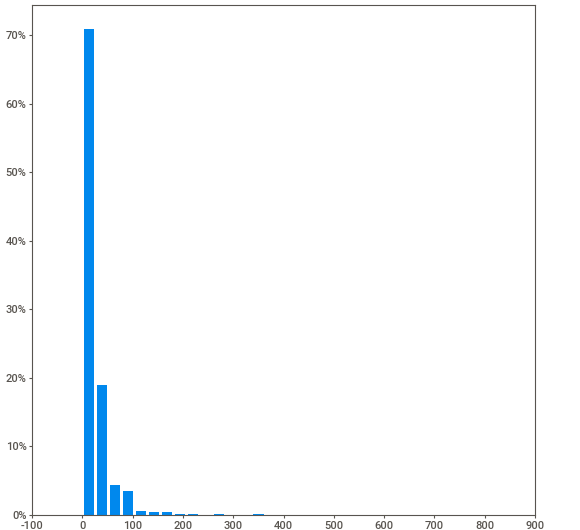
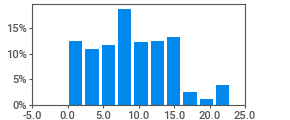
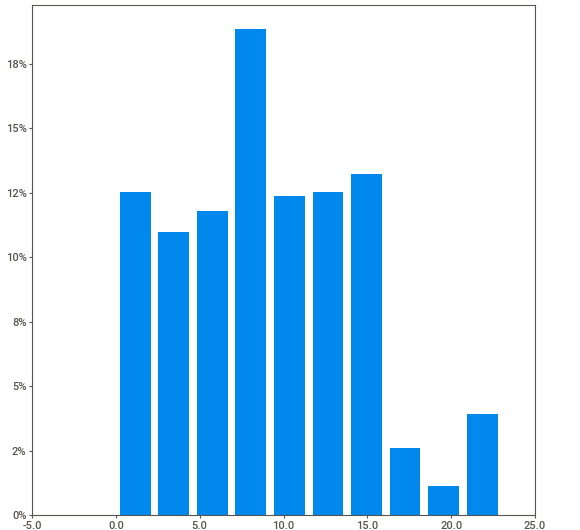
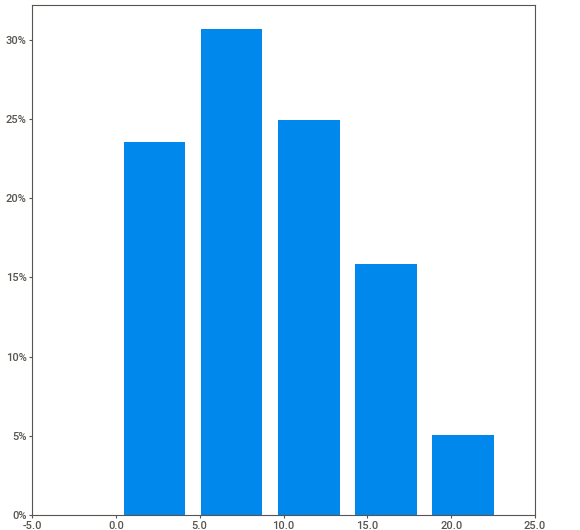
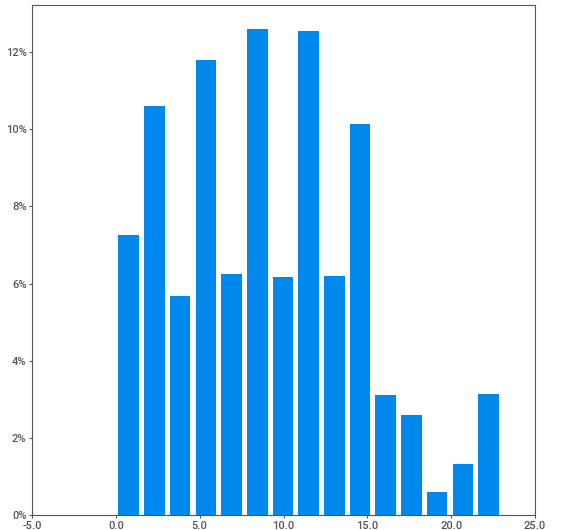
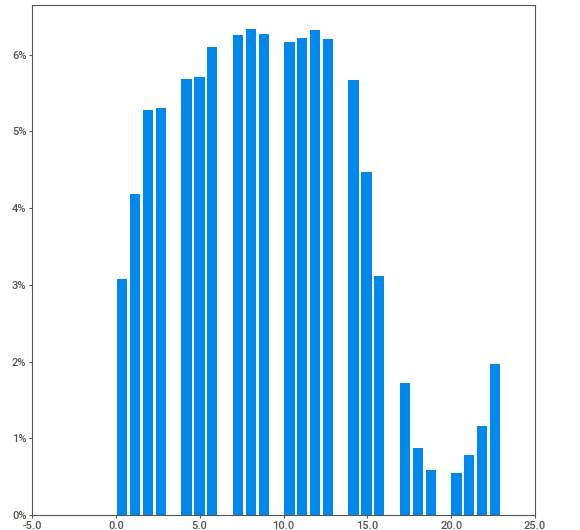
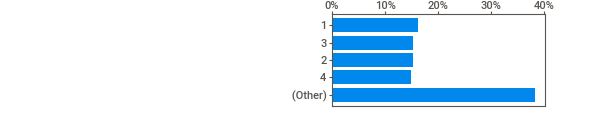
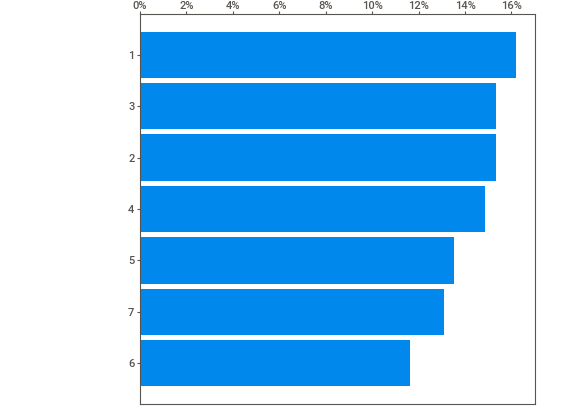
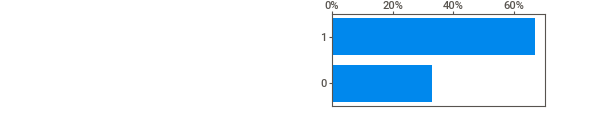
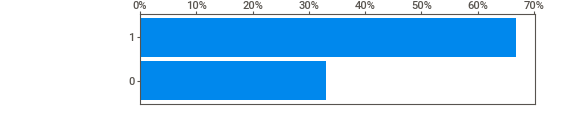
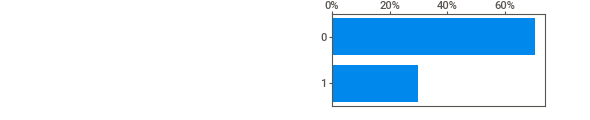
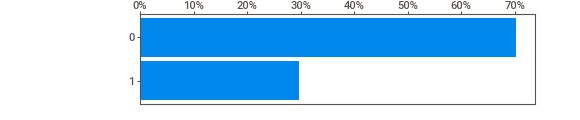
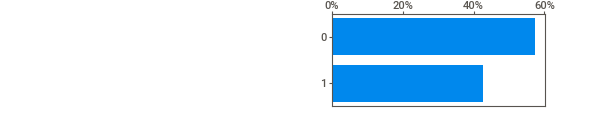
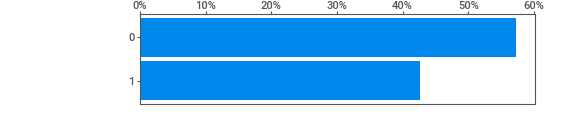
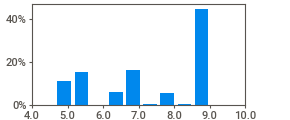
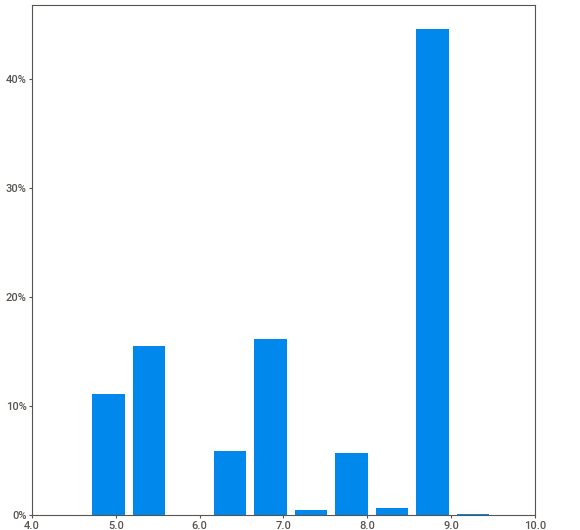
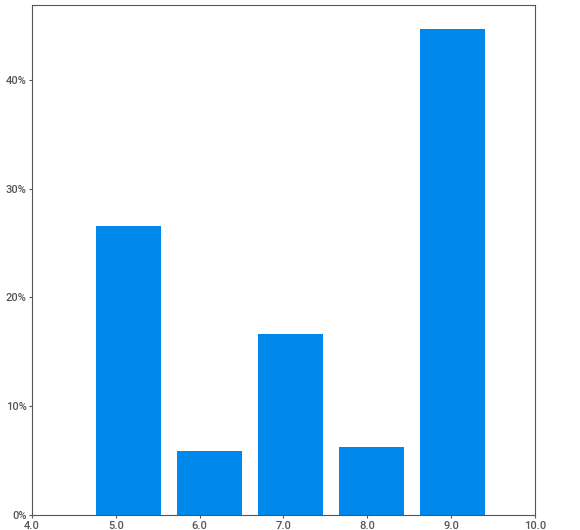
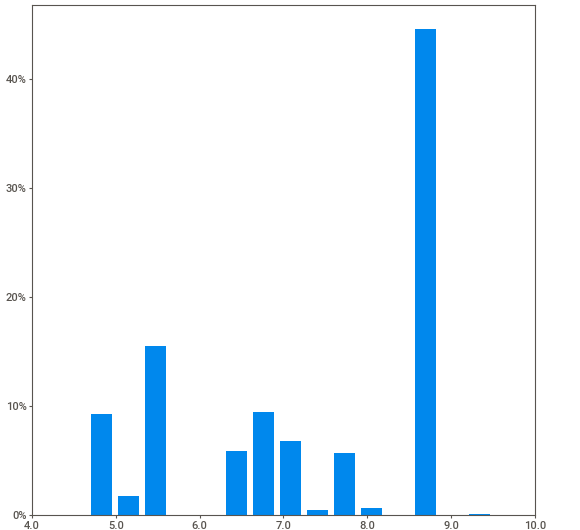
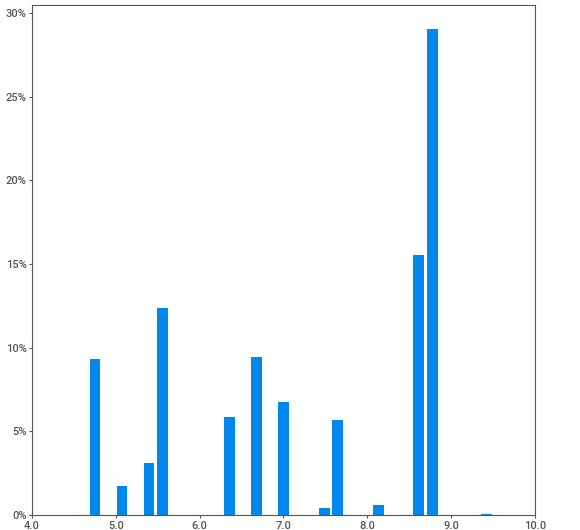
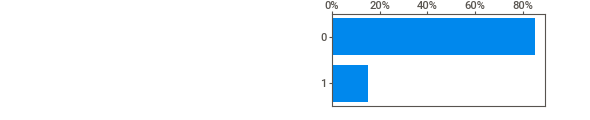
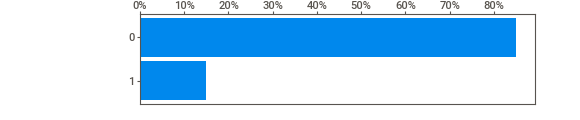
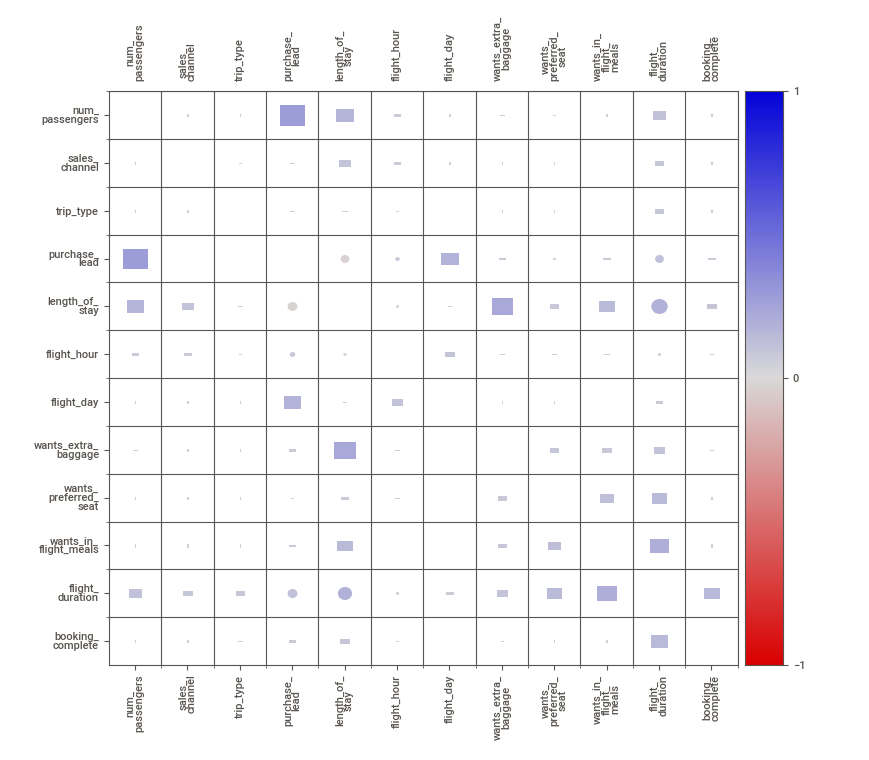
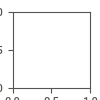

In [37]:
autoEDA = sweetviz.analyze(df)
autoEDA.show_notebook()

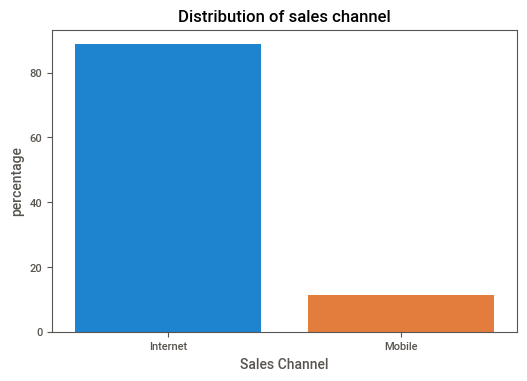

In [38]:
sales_channel = df['sales_channel'].value_counts()/len(df)*100
sns.barplot(x=sales_channel.index,y=sales_channel.values)
plt.title('Distribution of sales channel')
plt.xlabel('Sales Channel')
plt.ylabel('percentage')
plt.show();

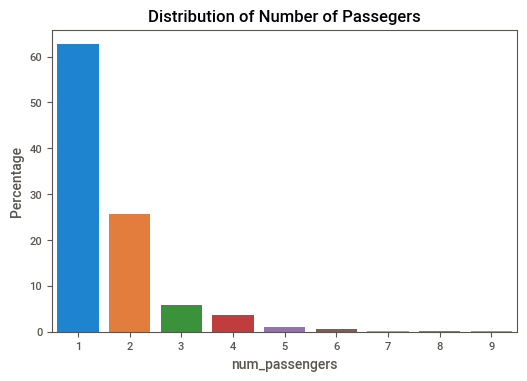

In [39]:
num_passengers = df['num_passengers'].value_counts()/len(df)*100
sns.barplot(x=num_passengers.index,y=num_passengers.values)
plt.title('Distribution of Number of Passegers')
plt.xlabel('num_passengers')
plt.ylabel('Percentage')
plt.show();

In [40]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


<AxesSubplot:xlabel='sales_channel', ylabel='purchase_lead'>

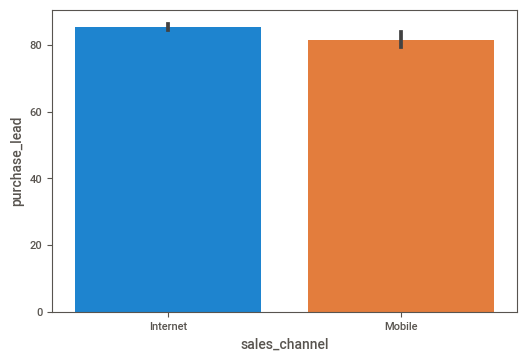

In [41]:

sns.barplot(data=df, x='sales_channel',y='purchase_lead')

(array([0, 1]), [Text(0, 0, 'Internet'), Text(1, 0, 'Mobile')])

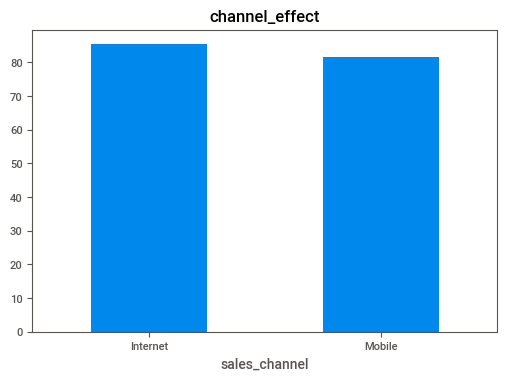

In [42]:
channel_effect= df.groupby('sales_channel')['purchase_lead'].mean()
channel_effect.plot(kind='bar')
plt.title('channel_effect')
plt.xticks(rotation=0)

### Data Preprocessing

In [43]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

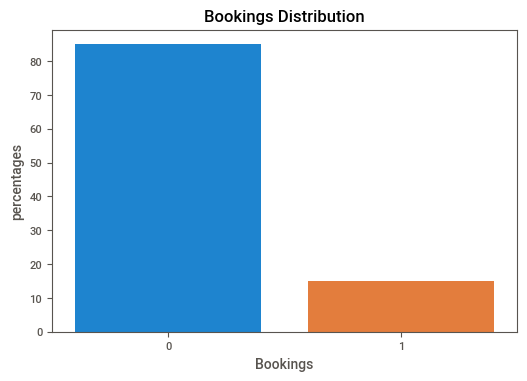

In [44]:
booking_complete=df['booking_complete'].value_counts()/len(df)*100
sns.barplot(x=booking_complete.index,y=booking_complete.values)
plt.title('Bookings Distribution')
plt.xlabel('Bookings')
plt.ylabel('percentages')
plt.show();

since the class is imbalanced we will use a resampling method called smote to deal with the class imbalance`

In [45]:
# Defining lables and predictors
lables = df.booking_complete
predictors =df.drop(['booking_complete','route','booking_origin'], axis=1)

# Train test split train and test datasets.
x_train, x_test, y_train, y_test = train_test_split(predictors,lables, test_size =.2,random_state=42)


In [46]:
x_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
39087,1,Mobile,RoundTrip,15,5,13,7,0,0,1,6.62
30893,1,Internet,RoundTrip,298,4,9,1,1,0,0,8.83
45278,2,Internet,RoundTrip,200,6,5,3,1,0,0,6.62
16398,1,Internet,RoundTrip,79,21,11,6,1,0,0,8.58
13653,1,Internet,RoundTrip,105,20,6,7,1,0,1,6.62
...,...,...,...,...,...,...,...,...,...,...,...
11284,1,Internet,RoundTrip,20,91,11,5,1,0,1,8.58
44732,1,Internet,RoundTrip,65,6,18,3,1,1,1,7.42
38158,2,Mobile,RoundTrip,107,5,6,2,1,0,0,7.57
860,4,Internet,RoundTrip,232,19,8,2,0,0,0,8.83


In [47]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
encoder = LabelEncoder()

# Create an empty DataFrame to store the encoded columns for the training dataset
train_encoded = pd.DataFrame()

# Create an empty DataFrame to store the encoded columns for the test dataset
test_encoded = pd.DataFrame()

# Iterate over the columns of x_train
for column in x_train.columns:
    if x_train[column].dtype == 'object':
        # Fit and transform the training data column
        encoded_train_column = encoder.fit_transform(x_train[column])
        train_encoded[column] = encoded_train_column
        
        # Transform the test data column using the same encoder
        encoded_test_column = encoder.transform(x_test[column])
        test_encoded[column] = encoded_test_column
    else:
        # If the column is not categorical, copy it as is
        train_encoded[column] = x_train[column]
        test_encoded[column] = x_test[column]

# Now train_encoded and test_encoded contain the encoded and non-encoded columns


### Modeling

In [48]:
# Scale X_train and X_test using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_encoded)
X_test_scaled = scaler.transform(test_encoded)

# Ensure X_train and X_test are scaled DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=x_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=x_test.columns)

from imblearn.over_sampling import SMOTE

# Initialize SMOTE with a specific sampling strategy (e.g., 0.5)
smote = SMOTE(sampling_strategy=0.5)

# Fit and transform the X_train dataset using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


### Decision Trees



In [49]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_resampled,y_train_resampled)


DecisionTreeClassifier()

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# Make predictions on the test dataset
y_pred = tree_clf.predict(X_test)  # X_test is your test data

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('--------------------------------------------------')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')
print('--------------------------------------------------')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')
print('--------------------------------------------------')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')
print('--------------------------------------------------')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)
print('--------------------------------------------------')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.75
--------------------------------------------------
Precision: 0.22
--------------------------------------------------
Recall: 0.27
--------------------------------------------------
F1-Score: 0.24
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      8520
           1       0.22      0.27      0.24      1480

    accuracy                           0.75     10000
   macro avg       0.54      0.55      0.55     10000
weighted avg       0.77      0.75      0.76     10000

--------------------------------------------------
Confusion Matrix:
[[7103 1417]
 [1085  395]]


Let's interpret the evaluation metrics, classification report, and confusion matrix for this classification model:

1. **Accuracy:** The model has an accuracy of 0.75, which means it correctly predicted 75% of the instances in the dataset. This metric provides an overall measure of the model's correctness.

2. **Precision:** Precision is 0.22 for the positive class (class 1). This indicates that, out of all instances predicted as positive, only 22% were true positives. Precision is a measure of how well the model avoids false positives. In this case, the precision is relatively low for class 1.

3. **Recall (Sensitivity):** Recall is 0.27 for the positive class (class 1). This means that the model correctly identified 27% of the actual positive instances. Recall measures how well the model captures all positive instances. While it's better than precision, it's still relatively low.

4. **F1-Score:** The F1-Score is 0.25 for the positive class (class 1). It's the harmonic mean of precision and recall and provides a balanced measure of the model's performance. In this case, the F1-Score for class 1 indicates that the model's ability to correctly identify positive instances is limited.

5. **Classification Report:** The classification report provides a summary of precision, recall, and F1-Score for both classes (class 0 and class 1). It also includes the support, which represents the number of instances for each class in the test dataset. The report shows that the model performs significantly better for class 0 compared to class 1.

6. **Confusion Matrix:** The confusion matrix is a table that shows the true positive (TP), true negative (TN), false positive (FP), and false negative (FN) counts for each class. In this case, the confusion matrix shows that class 0 has a high number of true positives (7137) and true negatives (1383), while class 1 has a low number of true positives (400) and a relatively high number of false negatives (1080).

Overall, the model has a moderate accuracy but struggles with classifying positive instances (class 1). It has relatively low precision, recall, and F1-Score for class 1, indicating that it may need further improvement, especially in correctly identifying positive cases. Depending on the specific application, you might consider adjusting the model, collecting more data, or using different techniques to address class imbalance.

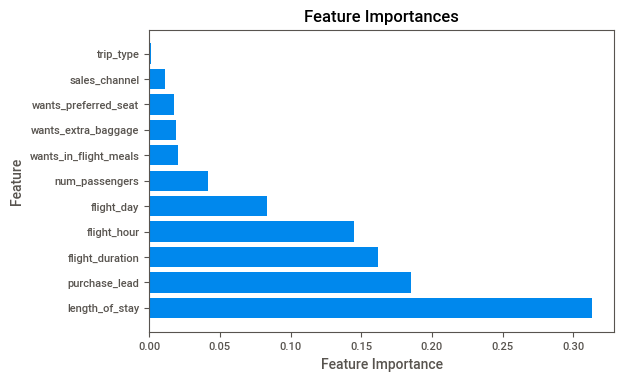

In [51]:
# Defining a function that plots the most important features.
import numpy as np
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    sorted_idx = np.argsort(model.feature_importances_)[::-1]  # Sort feature importances in descending order
    plt.figure()
    plt.barh(range(n_features), model.feature_importances_[sorted_idx], align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values[sorted_idx]) 
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.show()

plot_feature_importances(tree_clf)

### Random Forest Classifier

In [52]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(max_depth=5, random_state=42)

In [53]:
# Make predictions on the test dataset
y_pred_forest = forest.predict(X_test)  # X_test is your test data

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_forest)
print(f'Accuracy: {accuracy:.2f}')
print('--------------------------------------------------')

# Calculate precision
precision = precision_score(y_test, y_pred_forest)
print(f'Precision: {precision:.2f}')
print('--------------------------------------------------')

# Calculate recall
recall = recall_score(y_test, y_pred_forest)
print(f'Recall: {recall:.2f}')
print('--------------------------------------------------')

# Calculate F1-score
f1 = f1_score(y_test, y_pred_forest)
print(f'F1-Score: {f1:.2f}')
print('--------------------------------------------------')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred_forest)
print('Classification Report:')
print(classification_rep)
print('--------------------------------------------------')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_forest)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.85
--------------------------------------------------
Precision: 0.40
--------------------------------------------------
Recall: 0.03
--------------------------------------------------
F1-Score: 0.05
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8520
           1       0.40      0.03      0.05      1480

    accuracy                           0.85     10000
   macro avg       0.63      0.51      0.48     10000
weighted avg       0.79      0.85      0.79     10000

--------------------------------------------------
Confusion Matrix:
[[8464   56]
 [1442   38]]


### Hyperparameter Tuning
we can perform a grid search on the forest to identify the best parameters to use for our model

In [54]:
# Defining a parameter grid 
dt_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4, 5, 6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6],
}

In [55]:
from sklearn.model_selection import GridSearchCV
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(forest, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [56]:
# Make predictions on the test dataset
y_pred_grid = dt_grid_search.predict(X_test)  # X_test is your test data

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_grid)
print(f'Accuracy: {accuracy:.2f}')
print('--------------------------------------------------')

# Calculate precision
precision = precision_score(y_test, y_pred_grid)
print(f'Precision: {precision:.2f}')
print('--------------------------------------------------')

# Calculate recall
recall = recall_score(y_test, y_pred_grid)
print(f'Recall: {recall:.2f}')
print('--------------------------------------------------')

# Calculate F1-score
f1 = f1_score(y_test, y_pred_grid)
print(f'F1-Score: {f1:.2f}')
print('--------------------------------------------------')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred_grid)
print('Classification Report:')
print(classification_rep)
print('--------------------------------------------------')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_grid)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.84
--------------------------------------------------
Precision: 0.35
--------------------------------------------------
Recall: 0.10
--------------------------------------------------
F1-Score: 0.16
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8520
           1       0.35      0.10      0.16      1480

    accuracy                           0.84     10000
   macro avg       0.61      0.54      0.54     10000
weighted avg       0.79      0.84      0.80     10000

--------------------------------------------------
Confusion Matrix:
[[8236  284]
 [1327  153]]


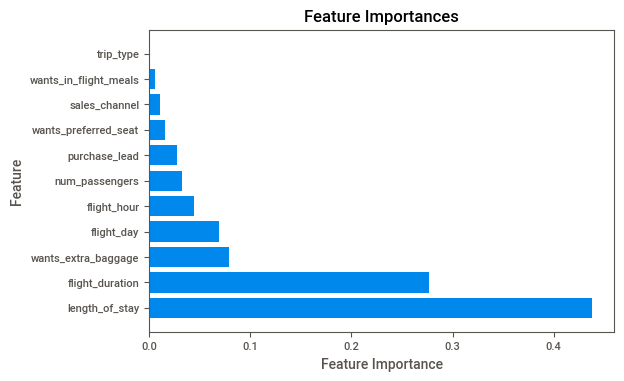

In [57]:
# Defining a function that plots the most important features.
import numpy as np
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    sorted_idx = np.argsort(model.feature_importances_)[::-1]  # Sort feature importances in descending order
    plt.figure()
    plt.barh(range(n_features), model.feature_importances_[sorted_idx], align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values[sorted_idx]) 
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.show()

plot_feature_importances(forest)